In [1]:
import fsps
import numpy as np 
from speclite import filters as specFilter
from astropy import units as U
from astropy import constants as Const
from astropy.io import fits 
from astropy.table import Table
from astropy.cosmology import Planck13
from astropy.cosmology import FlatLambdaCDM
# -- fomospec
from fomospec import util as UT
# -- plotting --
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [2]:
def LgalInput(galid): 
    # get Lgal galaxy metadata
    f_input = ''.join([UT.dat_dir(), 'Lgal/gal_inputs/', 
                      'gal_input_', str(galid), '_BGS_template_FSPS_uvmiles.csv'])
    gal_input = Table.read(f_input, delimiter=' ')
    return gal_input

def Lgal_sourceSpectra(galid, lib='bc03'): 
    # get Lgal source spectra
    if lib == 'bc03': lib_str = 'BC03_Stelib'
    elif lib == 'fsps': lib_str = 'FSPS_uvmiles'
        
    f_spec = fits.open(''.join([UT.dat_dir(), 'Lgal/templates/',
                      'gal_spectrum_'+str(galid)+'_BGS_template_', lib_str, '.fits']))
    meta = {}
    for k in f_spec[0].header.keys():
        meta[k] = f_spec[0].header[k]

    specobj = f_spec[1].data
    spec_in = {}
    spec_in['meta'] = meta
    spec_in['redshift'] = f_spec[0].header['REDSHIFT']
    spec_in['wave'] = specobj['wave']
    spec_in['flux'] = specobj['flux_dust_nonoise'] 
    spec_in['flux_dust_nonoise'] = specobj['flux_dust_nonoise'] # W/A/m^2
    spec_in['flux_nodust_nonoise'] = specobj['flux_nodust_nonoise']
    return spec_in

In [3]:
gal_id = 315435 #320292 #
gal_prop = LgalInput(gal_id)
spec_lgal_bc03 = Lgal_sourceSpectra(gal_id, lib='bc03')

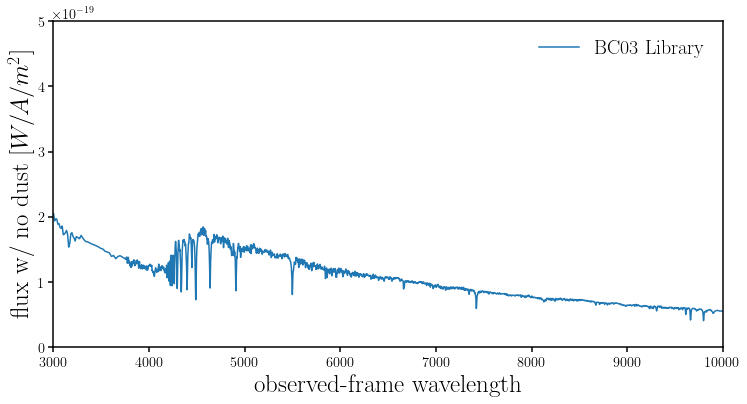

In [4]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(111)
sub.plot(spec_lgal_bc03['wave'], spec_lgal_bc03['flux_nodust_nonoise'], label="BC03 Library")
sub.set_xlabel('observed-frame wavelength', fontsize=25)
sub.set_xlim([3e3, 1e4])
sub.set_ylabel('flux w/ no dust [$W/A/m^2$]', fontsize=25)
sub.set_ylim([0., 5e-19])
sub.legend(loc='upper right', fontsize=20)

In [5]:
def photo(wave, flux): 
    filter_response = specFilter.load_filters('decam2014-g', 'decam2014-r', 'decam2014-z')
    _flux, _wave = filter_response.pad_spectrum(flux, wave)
    mags = filter_response.get_ab_magnitudes(_flux*U.Watt/U.m**2/U.Angstrom, _wave*U.Angstrom)
    return mags

In [6]:
photo(spec_lgal_bc03['wave'], spec_lgal_bc03['flux_nodust_nonoise'])

/anaconda2/lib/python2.7/site-packages/speclite-0.9.dev497-py2.7.egg/speclite/filters.py:1466: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values_no_units = values_no_units[values_slice]
/anaconda2/lib/python2.7/site-packages/speclite-0.9.dev497-py2.7.egg/speclite/filters.py:1520: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  integrand = integrand[values_slice]


decam2014-g,decam2014-r,decam2014-z
float64,float64,float64
18.766417749039988,18.489737865427667,18.28297880922516
